In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [35]:
df = pd.read_csv("Airline.csv",index_col=0)
print("There are {} rows for {} columns.".format(df.shape[0],df.shape[1]))
df.head()

There are 300153 rows for 11 columns.


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


# Data Inspection

In [36]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [74]:
df.airline.value_counts()

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 27.5+ MB


In [68]:
df.describe()

,duration,days_left,price,duration_new
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523,12.199951
std,7.191997,13.561004,22697.767366,7.131314
min,0.830000,1.000000,1105.000000,0.830000
25%,6.830000,15.000000,4783.000000,6.830000
50%,11.250000,26.000000,7425.000000,11.250000
75%,16.170000,38.000000,42521.000000,16.170000
max,49.830000,49.000000,123071.000000,30.180000


In [39]:
df['price'].median()

7425.0

# Exploratory Data Analysis (Descriptive Statistics & Data Visualization)

## 1. Price Analysis 

<Axes: xlabel='price'>

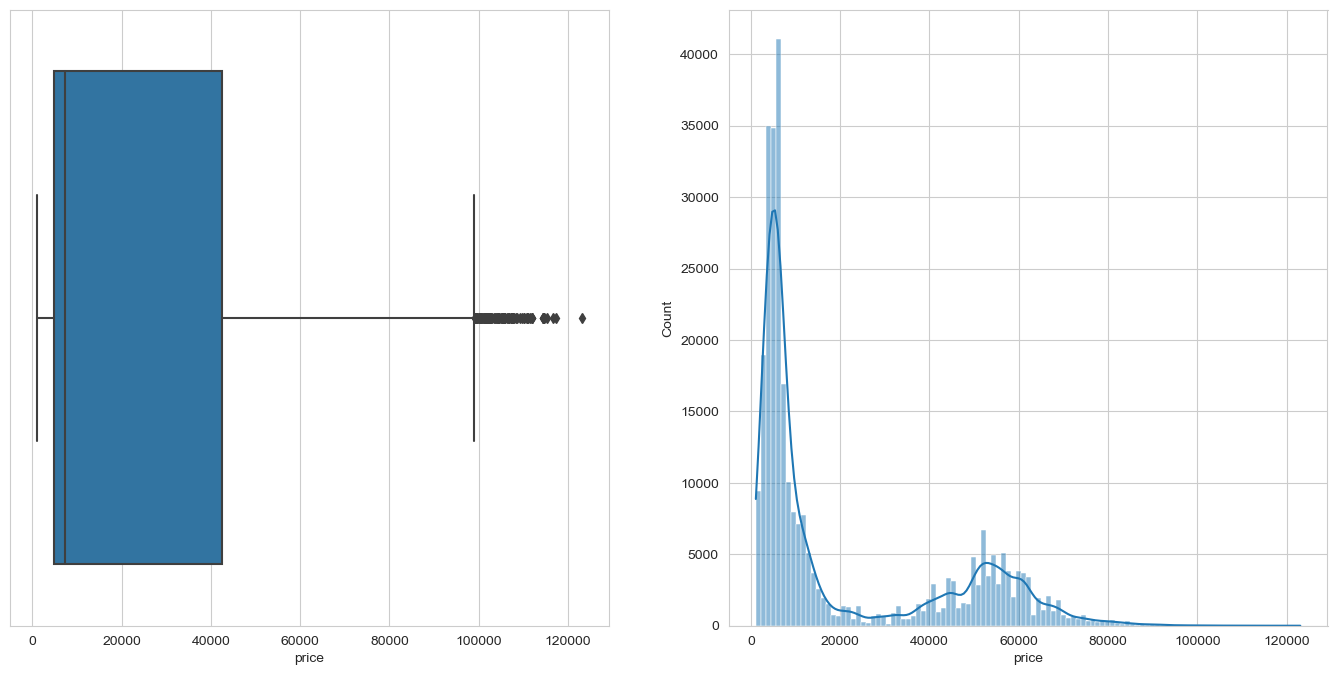

In [40]:
plt.figure(figsize = (17,8))
plt.subplot(1,2,2)
sns.histplot(x = 'price', data = df, kde = True)
plt.subplot(1,2,1)
sns.boxplot(x = 'price', data = df)

###### Even though the Mean of Price is 20889 but we can see the median is around 7425 this is because prices has both Business and Economy class Tickets. this can be clearly seen from the second graph 

## 2. Prices According to Source and Destination 

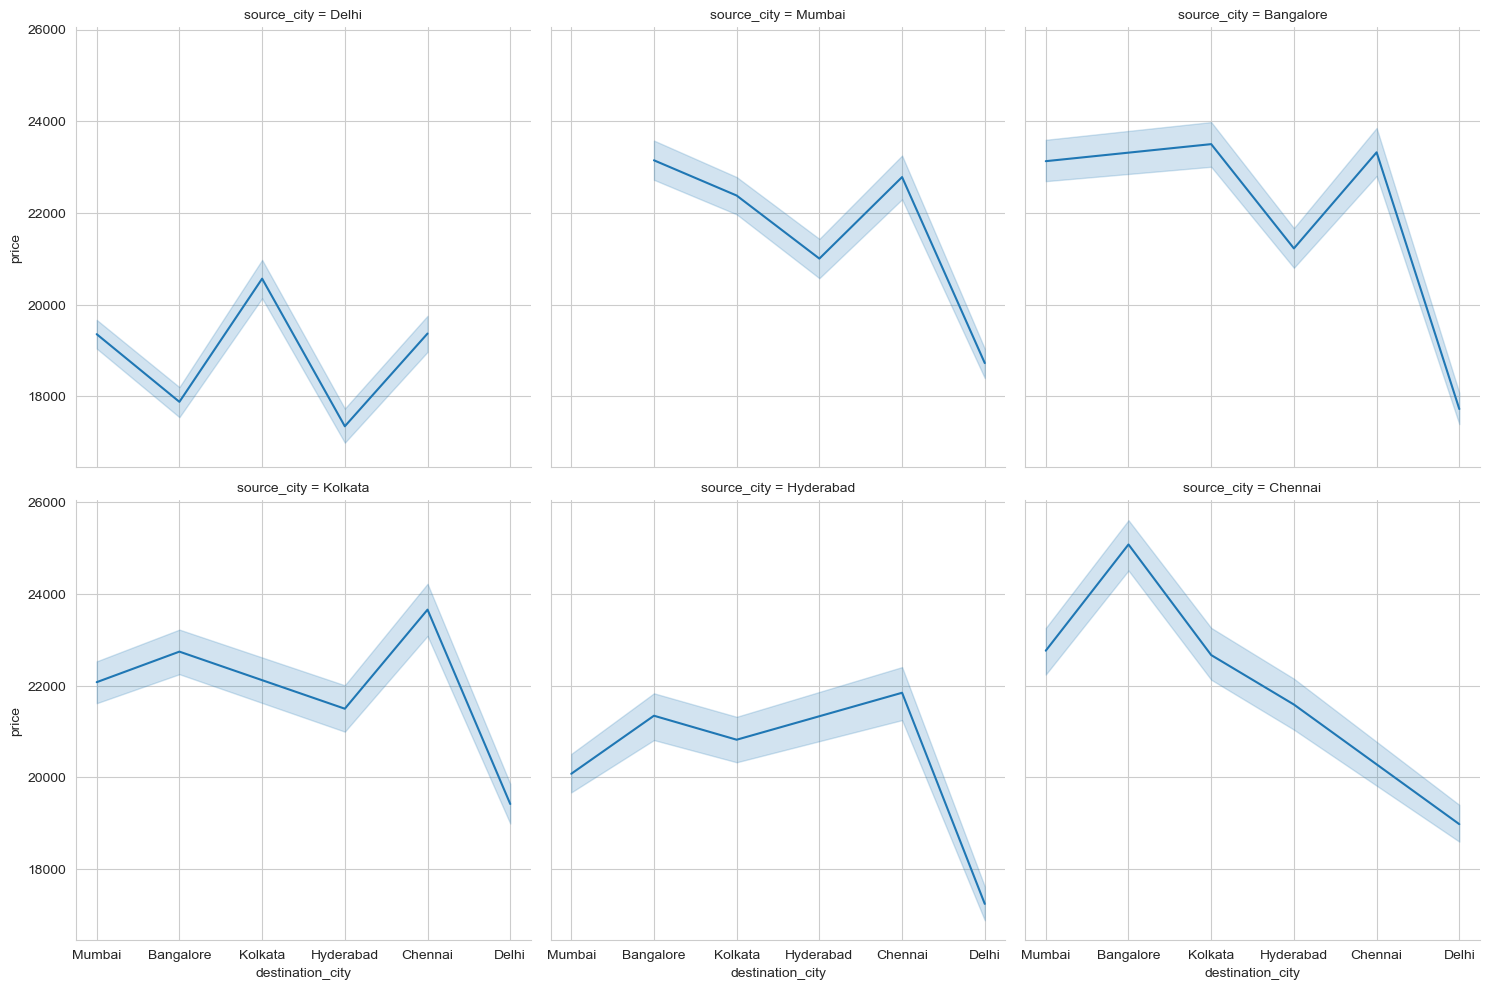

In [41]:
ax = sns.relplot(col="source_city", y="price", kind="line",x='destination_city', data=df, col_wrap=3)

#### As you can see from the graph, it appears that travel from Delhi to other locations is less expensive than travel from other cities. On the other hand, travel from other cities to Delhi is significantly less expensive. The best place for us to visit is thus -> DELHI

## 3. Ticket Price Analysis Based on Arrival and Departure Time  

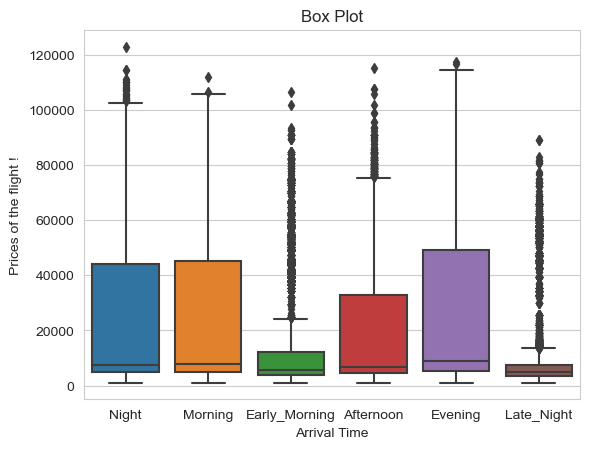

In [42]:
sns.boxplot(x=df["arrival_time"], y=df["price"])

# Set the plot title and labels
plt.title('Box Plot')
plt.xlabel('Arrival Time')
plt.ylabel('Prices of the flight !')

# Display the plot
plt.show()

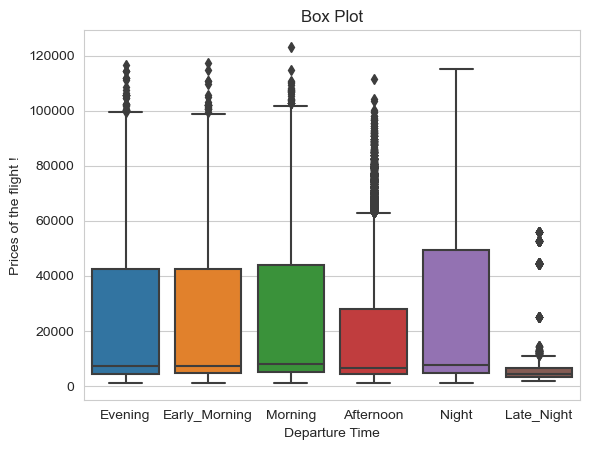

In [43]:
sns.boxplot(x=df["departure_time"], y=df["price"])

# Set the plot title and labels
plt.title('Box Plot')
plt.xlabel('Departure Time')
plt.ylabel('Prices of the flight !')

# Display the plot
plt.show()

##### The least expensive method of transportation is still leaving or arriving late at night. But it's also clear that flights in the afternoon are a little less expensive than those in the evening, morning, and night.

## 4. Prices in comparison to Different Airlines !

Text(0.5, 1.0, 'Violin Plot of Price by Airline (Economy Class)')

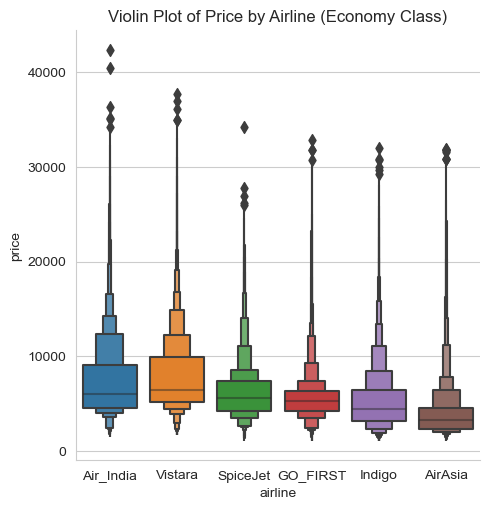

In [64]:
sns.catplot(y = "price", x = "airline",data = df.loc[df["class"]=='Economy'].sort_values("price", ascending = False), kind="boxen")
plt.title("Violin Plot of Price by Airline (Economy Class)")

##### It shows that AirAisa and Air_India has the cheapest Economy Flights range !

Text(0.5, 1.0, 'Violin Plot of Price by Airline (Business Class)')

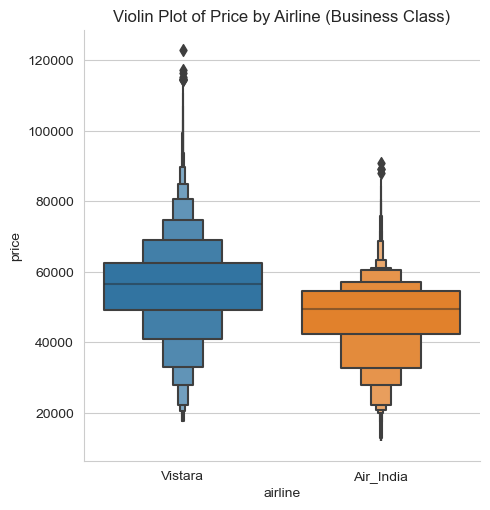

In [65]:
sns.catplot(y = "price", x = "airline",data = df.loc[df["class"]=='Business'].sort_values("price", ascending = False), kind="boxen")
plt.title("Violin Plot of Price by Airline (Business Class)")




####  Air_inda is Cheap than Vistara Business 

## 5. Duration of Flight wrt to prices !

Text(0.5, 1.0, 'Average prizes depending on the duration')

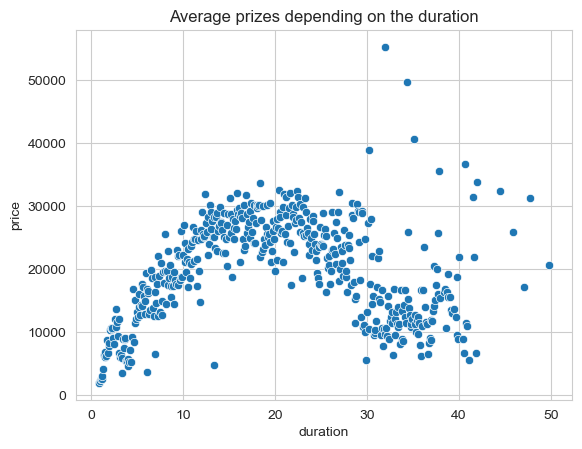

In [46]:
df_testcase = df.groupby(['duration'])['price'].mean().reset_index()
sns.scatterplot(x="duration", y="price", data=df_testcase)
plt.title("Average prizes depending on the duration")

#### After 20 hours, the price hits a high point before falling once again.

#### But certain outliers are there in the graph 

## 6. Ticket Prices of Different Airlines in bussiness and Economy class 

Text(0.5, 1.0, 'Class prices for Different Airlines !')

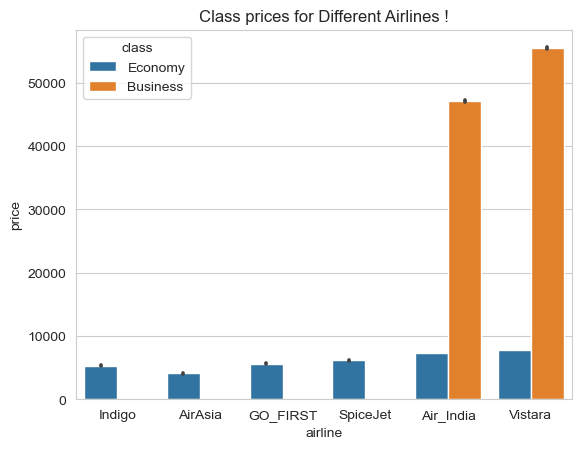

In [47]:
sns.barplot(x='airline',y='price',hue="class",data=df.sort_values("price"))

plt.title("Class prices for Different Airlines !")

#### There is a big Gap bw the prices of Economy and Business Class 

## 7. Price relation with Days Left !

Text(0.5, 1.0, 'Prices When Few Days left ')

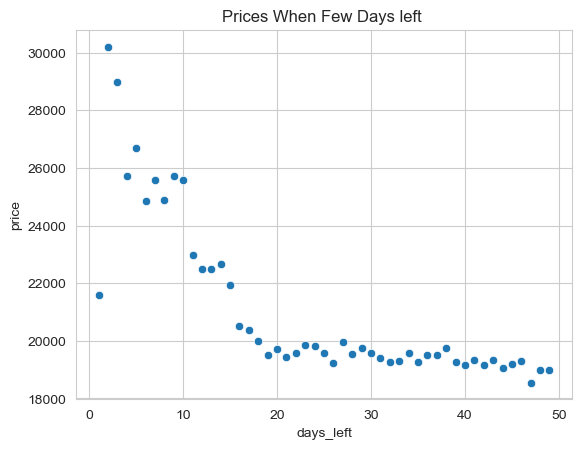

In [48]:
df_testcase = df.groupby(['days_left'])['price'].mean().reset_index()
sns.scatterplot(x="days_left", y="price", data=df_testcase)
plt.title("Prices When Few Days left ")

#### As infered when there are a few Days left eventually the prices rises whether it is Economy or Business class 

/var/folders/d_/19cw5dgj7xndqt0cs7511m180000gn/T/ipykernel_18327/3672301525.py:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



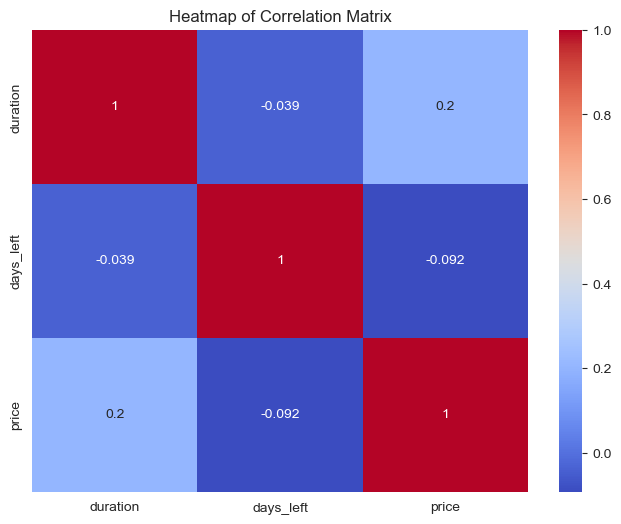

In [50]:
# Select columns with dtype object, float, and integer
selected_columns = df.select_dtypes(include=['object', 'float', 'int']).columns

# Create a correlation matrix
correlation_matrix = df[selected_columns].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

## 8.  No of Stops Vs Price Relation !

Text(0.5, 1.0, 'Stops Analysis for Economy')

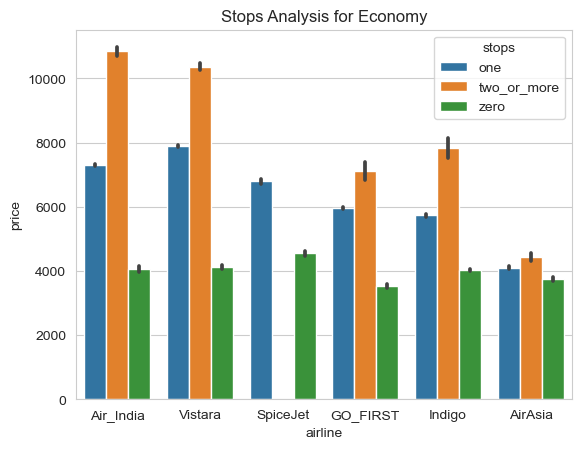

In [52]:
sns.barplot(y = "price", x = "airline",hue="stops",data = df.loc[df["class"]=='Economy'].sort_values("price", ascending = False))
plt.title("Stops Analysis for Economy")

Text(0.5, 1.0, 'Stops Analysis for Business Class')

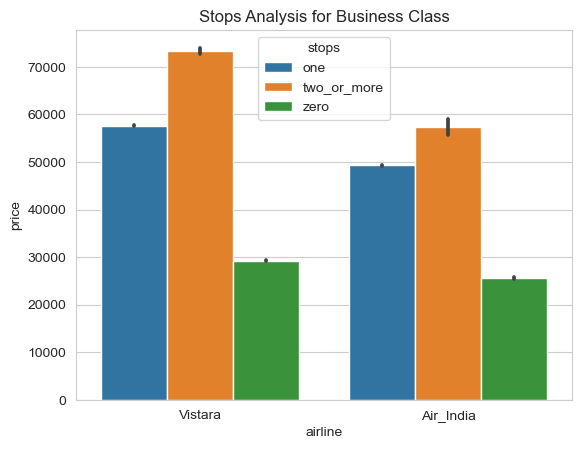

In [53]:
sns.barplot(y = "price", x = "airline",hue="stops",data = df.loc[df["class"]=='Business'].sort_values("price", ascending = False))

plt.title("Stops Analysis for Business Class")

#### Exception of AirAsia, where costs appear to be more stable, it is obvious that the more stops, the more expensive the flight. 

## 9. Most Sold Tickets by Company !

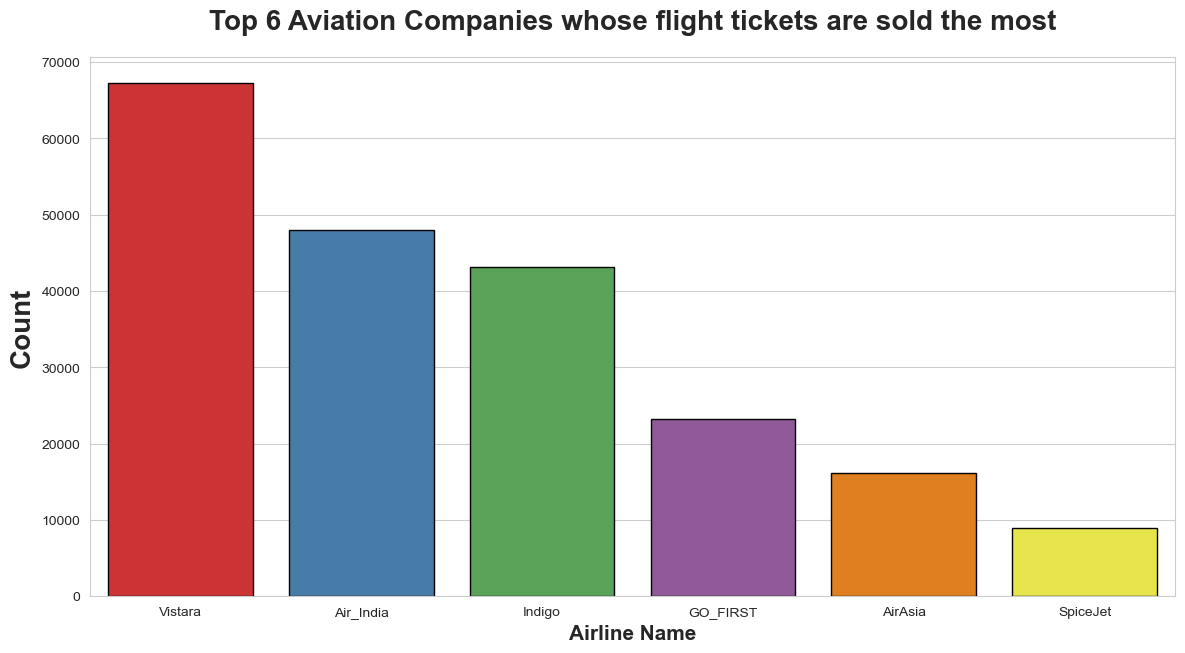

In [77]:
plt.subplots(figsize=(14,7))
# Filter the dataframe for Economy class
df_economy = df[df['class'] == 'Economy']

# Create the countplot for Economy class
sns.countplot(x="airline", data=df_economy, ec="black", palette="Set1", order=df_economy['airline'].value_counts().index)
plt.title("Top 6 Aviation Companies whose flight tickets are sold the most", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Airline Name", weight="bold", fontsize=15)
plt.show()

Text(0.5, 1.0, 'Top 6 Aviation Companies whose flight tickets are sold the most')

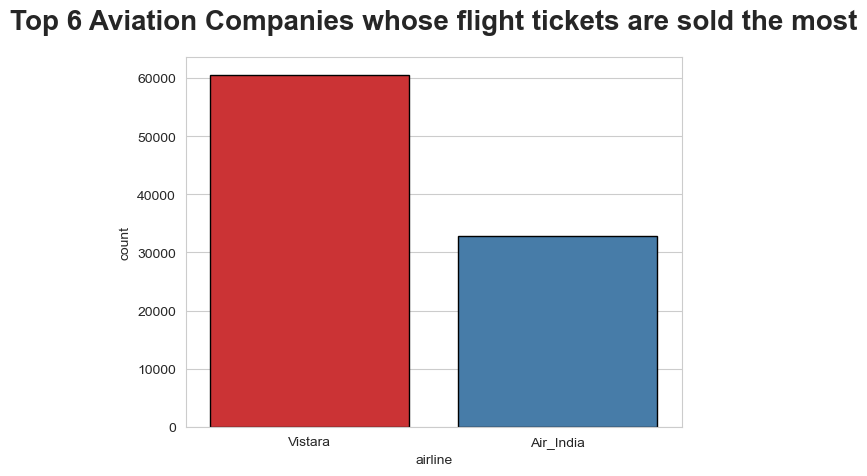

In [78]:
# Filter the dataframe for Business class
df_business = df[df['class'] == 'Business']

# Create the countplot for Business class
sns.countplot(x="airline", data=df_business, ec="black", palette="Set1", order=df_business['airline'].value_counts().index)

plt.title("Top 6 Aviation Companies whose flight tickets are sold the most", weight="bold",fontsize=20, pad=20)

#### Clearly Vistara Wins in Both Economy and Business Class ! 

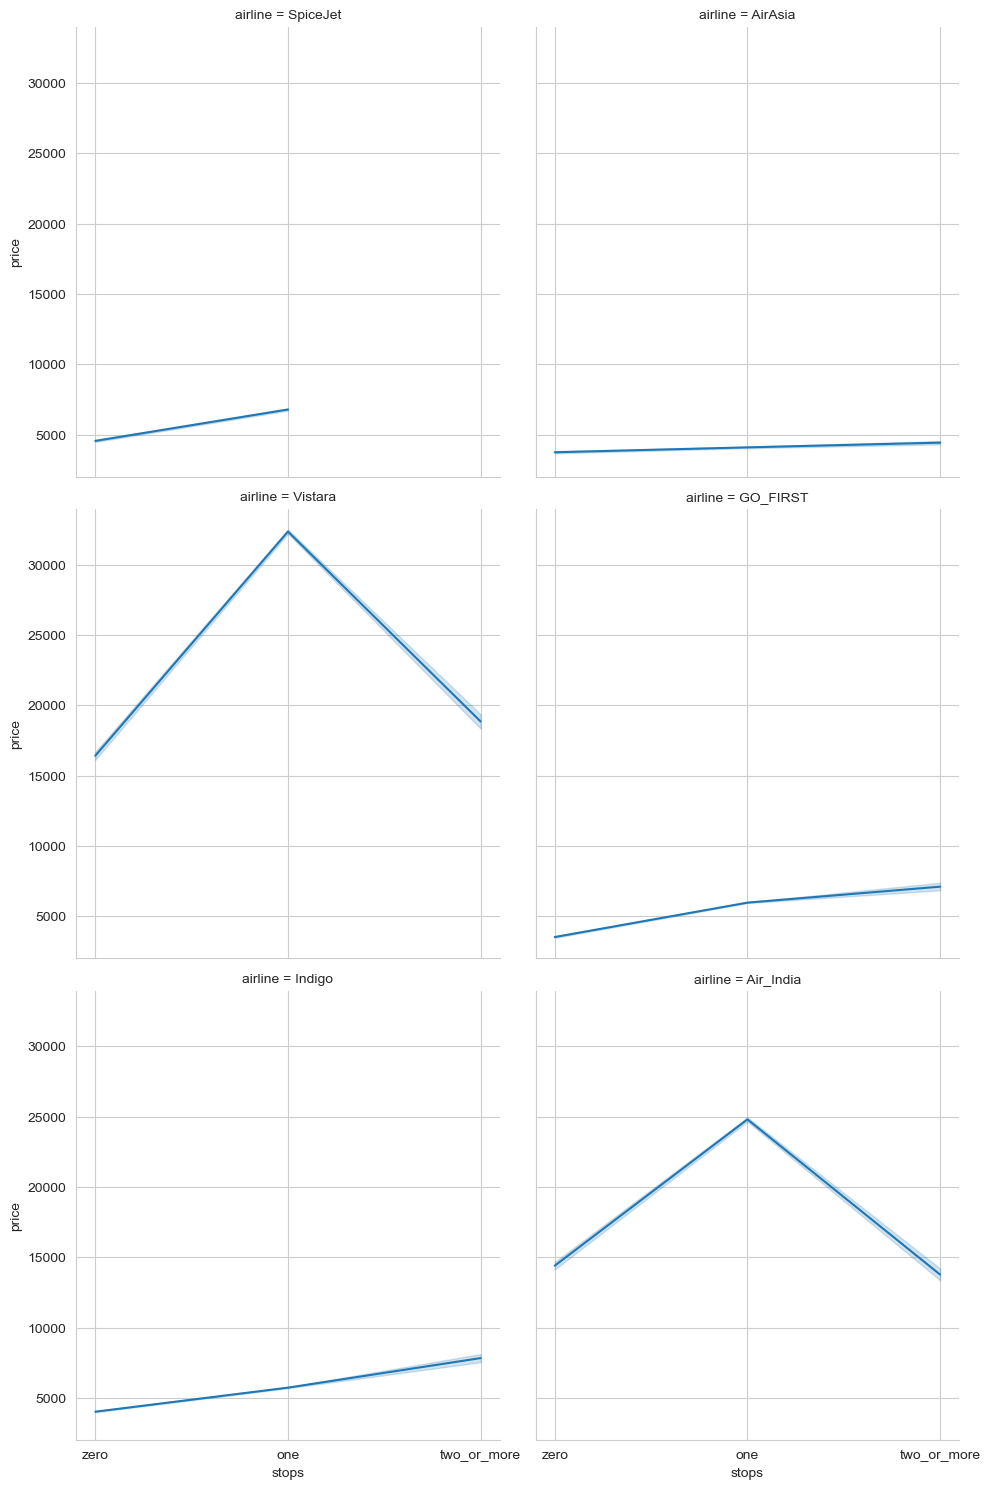

In [80]:
sns.relplot(col="airline", y="price", kind="line",x='stops', data=df, col_wrap=2)

#### As we can see, the one-stop condition is the most expensive among the others, which helps to explain why Vsitara and Air India are the most expensive airlines.

## 10. Stop wrt to Src and Destn 

Text(0.5, 1.0, 'Airline count based on stop')

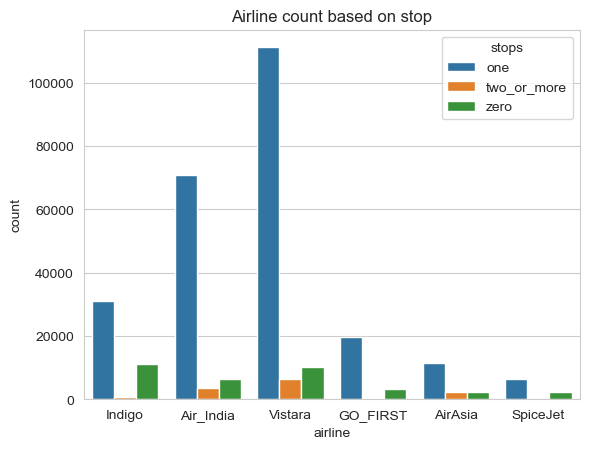

In [82]:
sns.countplot(x='airline',hue='stops', data=df.sort_values('stops', axis=0))
plt.title('Airline count based on stop')

[Text(0.5, 1.0, 'Source city count based on stops')]

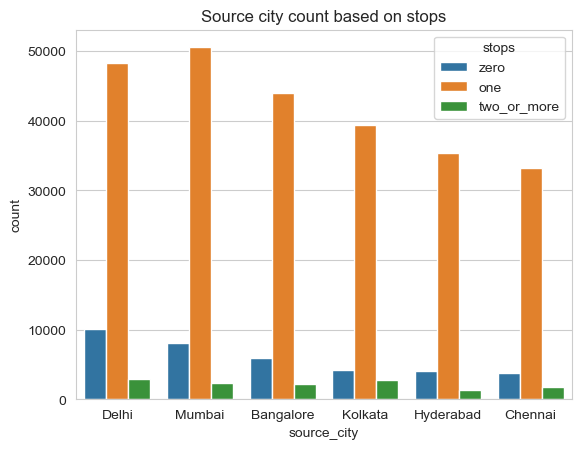

In [84]:
sns.countplot(x='source_city',hue='stops',data=df).set(title='Source city count based on stops')

[Text(0.5, 1.0, 'Destination city count based on stops')]

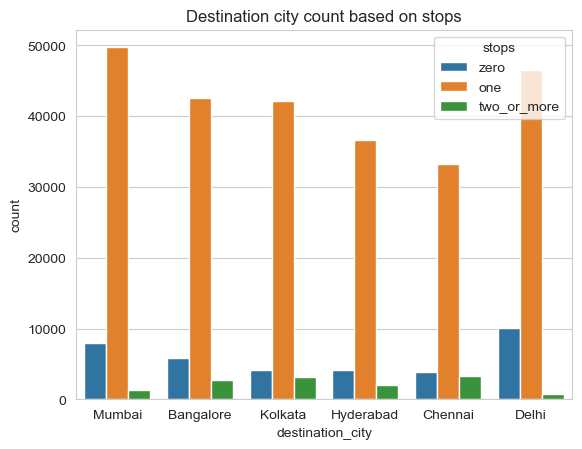

In [86]:
sns.countplot(x='destination_city',hue='stops',data=df).set(title='Destination city count based on stops')

# Outlier Detection

In [54]:
float_columns = df.select_dtypes(include='float').columns
integer_columns = df.select_dtypes(include='integer').columns


for column in float_columns:
  
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    
    outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]

    
    print(f"Outliers in float column {column}:")
    print(outliers)
    print("\n")


for column in integer_columns:
    
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    
    outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]


    print(f"Outliers in integer column {column}:")
    print(outliers)
    print("\n")

Outliers in float column duration:
          airline   flight source_city departure_time        stops  \
10534     Vistara   UK-706       Delhi      Afternoon  two_or_more   
10535     Vistara   UK-706       Delhi      Afternoon  two_or_more   
10540   Air_India  AI-9887       Delhi  Early_Morning  two_or_more   
10891     Vistara   UK-706       Delhi      Afternoon  two_or_more   
10892     Vistara   UK-706       Delhi      Afternoon  two_or_more   
...           ...      ...         ...            ...          ...   
296064  Air_India   AI-440     Chennai  Early_Morning          one   
296297  Air_India   AI-440     Chennai  Early_Morning          one   
296391  Air_India   AI-440     Chennai  Early_Morning          one   
296716  Air_India   AI-440     Chennai  Early_Morning          one   
297661  Air_India   AI-440     Chennai  Early_Morning          one   

       arrival_time destination_city     class  duration  days_left  price  
10534         Night        Bangalore   Economy 

<Axes: >

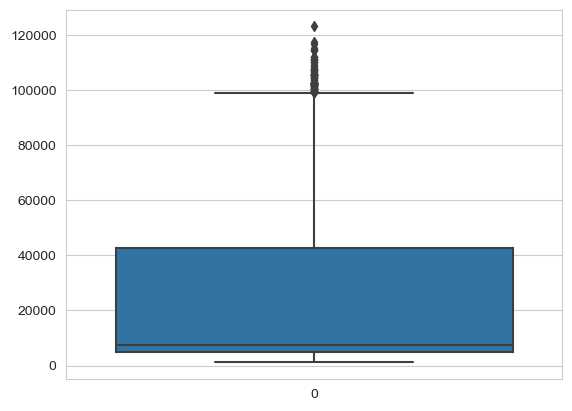

In [55]:
sns.boxplot(df.price)

### Didnt removed the Outliers from Price because last minute tickets can be expensive and I analyzed the dataset also had business class so thats justifiable 

<Axes: >

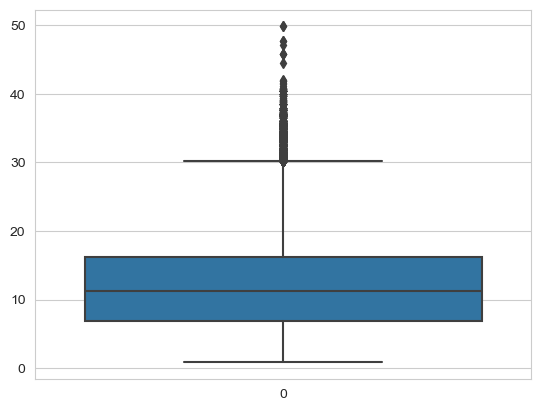

In [56]:
sns.boxplot(df.duration)

In [60]:
from feature_engine.outliers import Winsorizer

In [61]:
win=Winsorizer(capping_method='iqr',fold=1.5,tail="both",variables=["duration"])
df["duration_new"]=win.fit_transform(df[["duration"]])

<Axes: >

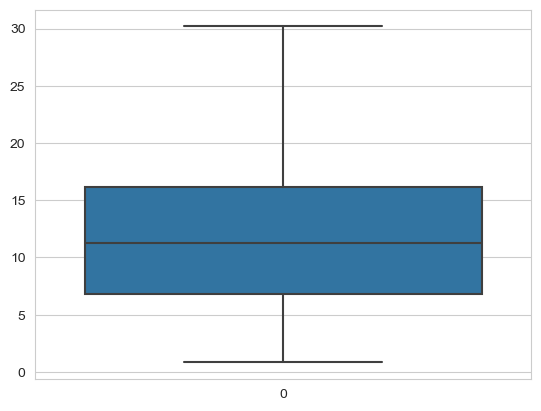

In [62]:
sns.boxplot(df.duration_new)

## New Duration Analysis After Removing the Outliers 

Text(0.5, 1.0, 'Average prizes depending on the duration')

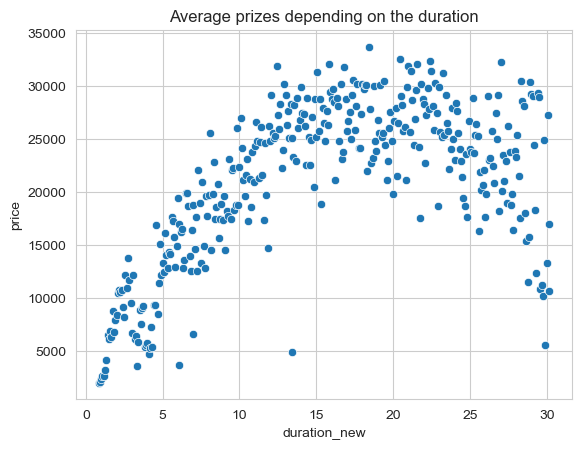

In [63]:
df_testcase = df.groupby(['duration_new'])['price'].mean().reset_index()
sns.scatterplot(x="duration_new", y="price", data=df_testcase)
plt.title("Average prizes depending on the duration")

# Documentation 

##### 1. Even though the Mean of Price is 20889 but we can see the median is around 7425 this is because prices has both Business and Economy class Tickets. this can be clearly seen from the second graph

##### 2. As you can see from the graph, it appears that travel from Delhi to other locations is less expensive than travel from other cities. On the other hand, travel from other cities to Delhi is significantly less expensive. The best place for us to visit is thus -> DELHI

##### 3. The least expensive method of transportation is still leaving or arriving late at night. But it's also clear that flights in the afternoon are a little less expensive than those in the evening, morning, and night.

##### 4. It shows that AirAisa and Air_India has the cheapest Economy Flights range !

##### 5. Air_inda is Cheap than Vistara Business

##### 6. There is a big Gap bw the prices of Economy and Business Class

##### 7. As infered when there are a few Days left eventually the prices rises whether it is Economy or Business class

##### 8. Exception of AirAsia, where costs appear to be more stable, it is obvious that the more stops, the more expensive the flight.

##### 9. Exception of AirAsia, where costs appear to be more stable, it is obvious that the more stops, the more expensive the flight.

##### 10. Didnt removed the Outliers from Price because last minute tickets can be expensive and I analyzed the dataset also had business class so thats justifiable

#### 11. As we can see, the one-stop condition is the most expensive among the others, which helps to explain why Vsitara and Air India are the most expensive airlines.